[View in Colaboratory](https://colab.research.google.com/github/gtambi143/SVM/blob/master/SVM_Linear.ipynb)

In [2]:
#importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import datasets

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
wine_data = datasets.load_wine()

#creating the pandas dataframe to understand the data better.
wine_data.feature_names

wine_data.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

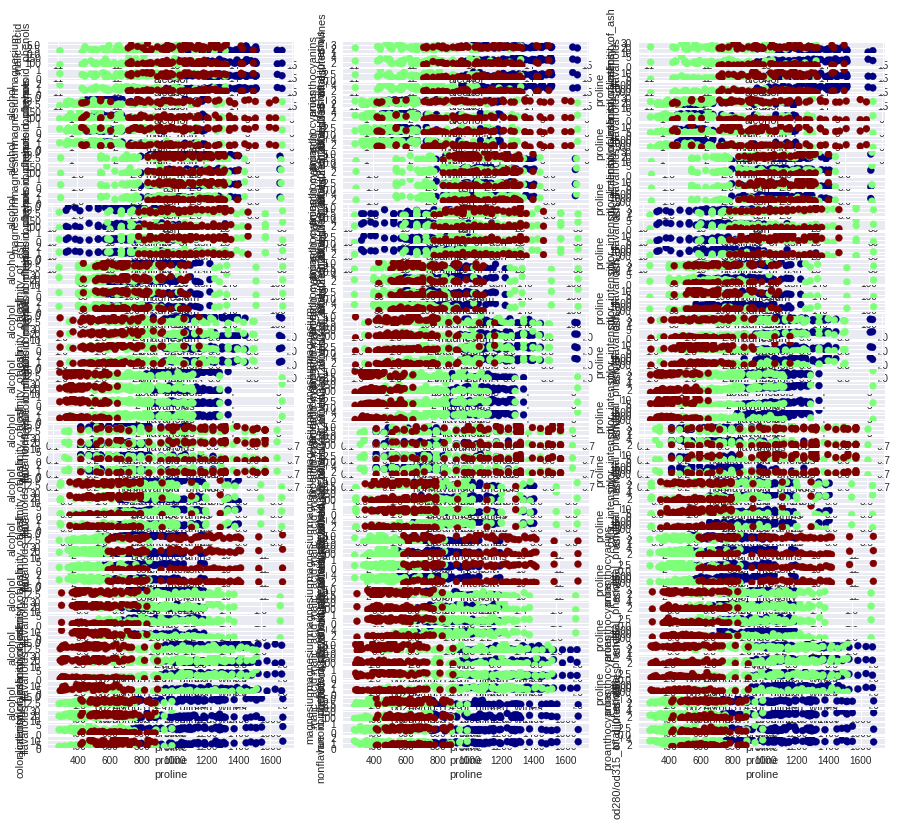

In [4]:
#exploring the ralationship between the data by visualizing it.
i = 1
plt.figure(figsize=(15,15))
for feature_x_pos,feature_x in enumerate(wine_data.feature_names):
  for feature_y_pos,feature_y in enumerate(wine_data.feature_names):
    if feature_x_pos != feature_y_pos:
      plt.subplot(60,3,i)
      plt.scatter(wine_data.data[:,feature_x_pos],wine_data.data[:,feature_y_pos],c = wine_data.target, cmap = 'jet')
      plt.xlabel(feature_x)
      plt.ylabel(feature_y)
      i=i+1
      
# plt.figure(figsize=(15,15))
# plt.subplot(3,3,1)
# plt.scatter(wine_data.data[:,0],wine_data.data[:,1],c = wine_data.target, cmap = 'jet')
# plt.subplot(3,3,2)
# plt.scatter(wine_data.data[:,0],wine_data.data[:,1],c = wine_data.target, cmap = 'jet')
# plt.subplot(3,3,3)
# plt.scatter(wine_data.data[:,0],wine_data.data[:,1],c = wine_data.target, cmap = 'jet')
# plt.subplot(3,3,4)
# plt.scatter(wine_data.data[:,0],wine_data.data[:,1],c = wine_data.target, cmap = 'jet')
# plt.subplot(3,3,5)
# plt.scatter(wine_data.data[:,0],wine_data.data[:,1],c = wine_data.target, cmap = 'jet')
# plt.subplot(3,3,6)
# plt.scatter(wine_data.data[:,0],wine_data.data[:,1],c = wine_data.target, cmap = 'jet')
# plt.subplot(3,3,7)
# plt.scatter(wine_data.data[:,0],wine_data.data[:,1],c = wine_data.target, cmap = 'jet')
# plt.subplot(3,3,8)
# plt.scatter(wine_data.data[:,0],wine_data.data[:,1],c = wine_data.target, cmap = 'jet')
# plt.subplot(3,3,9)
# plt.scatter(wine_data.data[:,0],wine_data.data[:,1],c = wine_data.target, cmap = 'jet')

**Parameter Tuning in SVM**

![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_111.png)![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_12.png)![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_15.png)![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_18.png)

# **Linear Kernel**

In [66]:
#test train split

train_x, test_x, train_y, test_y = train_test_split(wine_data.data, wine_data.target, test_size = 0.33, random_state = 0)


#SVM with the linear kernel
svm_model_linear = svm.SVC(C=1, kernel='linear', degree=3, gamma=1, coef0=0.0, shrinking=True, 
                    probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
                    decision_function_shape='ovr', random_state=None)

#There are various parameters to pass in SVM model. Most important parameters which creates a major impact on the model are 
# C, gamma, kernel

#C can have various values like 'linear' - used for a linear hyperplane
# 'rbf' and 'poly' - used for non-linear hyperplane

# gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set 
# i.e. generalization error and cause over-fitting problem.

# C: Penalty parameter C of the error term. It also controls the trade off between smooth decision boundary and 
# classifying the training points correctly.

svm_model_linear.fit(train_x, train_y)

svm_model_linear.score(train_x, train_y)

#predicting the classes for test data using the above model
predicted_test = svm_model_linear.predict(test_x)

metrics.accuracy_score(predicted_test,test_y)


0.9830508474576272

# **RBF Kernel**

In [74]:
#SVM with the RBF kernel
svm_model_rbf = svm.SVC(C=1, kernel='rbf', degree=3, gamma=1, coef0=0.0, shrinking=True, 
                    probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
                    decision_function_shape='ovr', random_state=None)

svm_model_rbf.fit(train_x, train_y)

svm_model_rbf.score(train_x, train_y)

#predicting the classes for test data using the above model
predicted_test = svm_model_rbf.predict(test_x)

metrics.accuracy_score(predicted_test,test_y)


0.4067796610169492

# **Poly Kernel**

In [46]:
#SVM with the Poly kernel
svm_model_poly = svm.SVC(C=1, kernel='poly', degree=3, gamma=1, coef0=0.0, shrinking=True, 
                    probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
                    decision_function_shape='ovr', random_state=None)

svm_model_poly.fit(train_x, train_y)

svm_model_poly.score(train_x, train_y)

#predicting the classes for test data using the above model
predicted_test = svm_model_poly.predict(test_x)

metrics.accuracy_score(predicted_test,test_y)


0.9491525423728814